____

# <font color=#FFAA11> Two-Temperature Model </font>

The TTM considered here is given by
$$\begin{align}
c_e \frac{\partial T_e}{\partial t} &= \frac{1}{r}\frac{\partial}{\partial r}\left(r k_e \frac{\partial T_e}{\partial r}\right) - G (T_e - T_i), \\
c_i\frac{\partial T_i}{\partial t} &= \frac{1}{r}\frac{\partial}{\partial r}\left(r k_i \frac{\partial T_i}{\partial r}\right) + G (T_e - T_i),
\end{align}
$$

which assumes a cylindrical plasma composed of electrons and ions with no mass flow. 

Main areas where major improvements are needed:
1. Plasma Formulary version of parameters
2. Allow density variation 
3. Nicer visualizations, including animations, would be nice to have in the long run.

Current Bug- Electron Heat Capacity definitely not right!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from TTM import Cylindrical_Grid, Experiment, TwoTemperatureModel


# Create Experimental Information

In [2]:
grid  = Cylindrical_Grid(200e-6) 
Zstar, A = 1, 40
Te_initial, Ti_initial = 18000, 10300 #[K]
laser_width = 50e-6 # [m]

# Create Experimental layout and TTM solver
Argon = Experiment(grid, 6.3e26, Zstar, A, Te_initial, Ti_initial,laser_width, gas_name='Argon')
ttm = TwoTemperatureModel(Argon)

In [3]:
ttm.make_times()
ttm.print_timescales()


Simulation time: 9.0e-01 ns,  dt = 2.4e-02 ps, steps = 37161
  Diffusion time (r_max): e:2.4e+00 ns, i:5.2e+45 ns 
  Diffusion time (dr): e:2.4e-04 ns, i:5.2e+41 ns 
  Thermalization Time: 2e+02 ps


In [4]:
Argon.print_exp_info()

Γ_ee = 1.02
Γ_ei = 1.02
Γ_ii = 1.78


# Solve Two Temperature Model

In [6]:
ttm.Te

array([1.96216065e+04, 1.96026756e+04, 1.95647557e+04, 1.95077985e+04,
       1.94317640e+04, 1.93366206e+04, 1.92223456e+04, 1.90889269e+04,
       1.89363634e+04, 1.87646676e+04, 1.85738669e+04, 1.83640066e+04,
       1.81351528e+04, 1.78873960e+04, 1.76208548e+04, 1.73356814e+04,
       1.70320665e+04, 1.67102460e+04, 1.63705083e+04, 1.60132020e+04,
       1.56387458e+04, 1.52476383e+04, 1.48404695e+04, 1.44179330e+04,
       1.39808394e+04, 1.35301293e+04, 1.30668876e+04, 1.25923558e+04,
       1.21079435e+04, 1.16152366e+04, 1.11160004e+04, 1.06121766e+04,
       1.01058715e+04, 9.59933292e+03, 9.09491598e+03, 8.59503544e+03,
       8.10210720e+03, 7.61848153e+03, 7.14637305e+03, 6.68779419e+03,
       6.24449893e+03, 5.81794256e+03, 5.40926093e+03, 5.01926969e+03,
       4.64848075e+03, 4.29713165e+03, 3.96522241e+03, 3.65255502e+03,
       3.35877193e+03, 3.08339097e+03, 2.82583576e+03, 2.58546116e+03,
       2.36157411e+03, 2.15345041e+03, 1.96034801e+03, 1.78151757e+03,
      

In [5]:
ttm.solve_TTM(tmax=4.5e-9)

λ =  [5.14276168e-01 5.13955982e-01 5.12996339e-01 5.11399976e-01
 5.09171456e-01 5.06317153e-01 5.02845245e-01 4.98765700e-01
 4.94090259e-01 4.88832409e-01 4.83007365e-01 4.76632031e-01
 4.69724969e-01 4.62306350e-01 4.54397912e-01 4.46022898e-01
 4.37205994e-01 4.27973256e-01 4.18352029e-01 4.08370860e-01
 3.98059392e-01 3.87448263e-01 3.76568982e-01 3.65453801e-01
 3.54135582e-01 3.42647643e-01 3.31023609e-01 3.19297248e-01
 3.07502298e-01 2.95672299e-01 2.83840411e-01 2.72039233e-01
 2.60300627e-01 2.48655535e-01 2.37133809e-01 2.25764040e-01
 2.14573401e-01 2.03587497e-01 1.92830231e-01 1.82323682e-01
 1.72088004e-01 1.62141338e-01 1.52499748e-01 1.43177175e-01
 1.34185417e-01 1.25534117e-01 1.17230793e-01 1.09280868e-01
 1.01687728e-01 9.44528026e-02 8.75756522e-02 8.10540758e-02
 7.48842287e-02 6.90607509e-02 6.35769035e-02 5.84247090e-02
 5.35950969e-02 4.90780482e-02 4.48627403e-02 4.09376880e-02
 3.72908807e-02 3.39099128e-02 3.07821075e-02 2.78946322e-02
 2.52346046e-02 2.2

λ =  [5.08376414e-01 5.07849577e-01 5.06790739e-01 5.05192705e-01
 5.03047876e-01 5.00349932e-01 4.97095066e-01 4.93282562e-01
 4.88914835e-01 4.83997158e-01 4.78537312e-01 4.72545282e-01
 4.66033061e-01 4.59014539e-01 4.51505461e-01 4.43523414e-01
 4.35087828e-01 4.26219983e-01 4.16942991e-01 4.07281770e-01
 3.97262993e-01 3.86915011e-01 3.76267751e-01 3.65352580e-01
 3.54202150e-01 3.42850212e-01 3.31331405e-01 3.19681028e-01
 3.07934791e-01 2.96128560e-01 2.84298091e-01 2.72478759e-01
 2.60705297e-01 2.49011537e-01 2.37430164e-01 2.25992486e-01
 2.14728226e-01 2.03665330e-01 1.92829804e-01 1.82245574e-01
 1.71934373e-01 1.61915658e-01 1.52206547e-01 1.42821789e-01
 1.33773760e-01 1.25072478e-01 1.16725645e-01 1.08738714e-01
 1.01114966e-01 9.38556112e-02 8.69599076e-02 8.04252833e-02
 7.42474766e-02 6.84206808e-02 6.29376950e-02 5.77900779e-02
 5.29683023e-02 4.84619085e-02 4.42596553e-02 4.03496654e-02
 3.67195654e-02 3.33566181e-02 3.02478468e-02 2.73801505e-02
 2.47404093e-02 2.2

λ =  [5.03194771e-01 5.02685586e-01 5.01664515e-01 5.00128375e-01
 4.98073803e-01 4.95497695e-01 4.92397660e-01 4.88772437e-01
 4.84622223e-01 4.79948895e-01 4.74756140e-01 4.69049512e-01
 4.62836452e-01 4.56126296e-01 4.48930289e-01 4.41261612e-01
 4.33135428e-01 4.24568933e-01 4.15581401e-01 4.06194228e-01
 3.96430946e-01 3.86317210e-01 3.75880758e-01 3.65151319e-01
 3.54160488e-01 3.42941545e-01 3.31529248e-01 3.19959563e-01
 3.08269383e-01 2.96496196e-01 2.84677751e-01 2.72851702e-01
 2.61055255e-01 2.49324821e-01 2.37695688e-01 2.26201716e-01
 2.14875059e-01 2.03745920e-01 1.92842354e-01 1.82190092e-01
 1.71812420e-01 1.61730085e-01 1.51961242e-01 1.42521435e-01
 1.33423606e-01 1.24678138e-01 1.16292921e-01 1.08273436e-01
 1.00622869e-01 9.33422299e-02 8.64304923e-02 7.98847419e-02
 7.37003325e-02 6.78710474e-02 6.23892639e-02 5.72461189e-02
 5.24316721e-02 4.79350675e-02 4.37446887e-02 3.98483086e-02
 3.62332317e-02 3.28864275e-02 2.97946553e-02 2.69445785e-02
 2.43228693e-02 2.1

 2.27179542e-04]
λ =  [4.97849937e-01 4.97363716e-01 4.96389172e-01 4.94924062e-01
 4.92966085e-01 4.90513052e-01 4.87563070e-01 4.84114764e-01
 4.80167489e-01 4.75721534e-01 4.70778308e-01 4.65340511e-01
 4.59412271e-01 4.52999283e-01 4.46108928e-01 4.38750390e-01
 4.30934774e-01 4.22675229e-01 4.13987056e-01 4.04887824e-01
 3.95397461e-01 3.85538324e-01 3.75335236e-01 3.64815480e-01
 3.54008740e-01 3.42946983e-01 3.31664284e-01 3.20196577e-01
 3.08581352e-01 2.96857299e-01 2.85063896e-01 2.73240980e-01
 2.61428289e-01 2.49665003e-01 2.37989311e-01 2.26437990e-01
 2.15046036e-01 2.03846337e-01 1.92869405e-01 1.82143161e-01
 1.71692782e-01 1.61540590e-01 1.51706010e-01 1.42205554e-01
 1.33052862e-01 1.24258764e-01 1.15831377e-01 1.07776228e-01
 1.00096394e-01 9.27926526e-02 8.58636523e-02 7.93060841e-02
 7.31148609e-02 6.72832979e-02 6.18032938e-02 5.66655083e-02
 5.18595371e-02 4.73740799e-02 4.31971024e-02 3.93159895e-02
 3.57176896e-02 3.23888498e-02 2.93159397e-02 2.64853657e-02
 2

 2.27179542e-04]
λ =  [4.93450386e-01 4.92983014e-01 4.92046361e-01 4.90638438e-01
 4.88757202e-01 4.86400646e-01 4.83566913e-01 4.80254427e-01
 4.76462047e-01 4.72189218e-01 4.67436142e-01 4.62203937e-01
 4.56494806e-01 4.50312197e-01 4.43660976e-01 4.36547586e-01
 4.28980218e-01 4.20968983e-01 4.12526079e-01 4.03665960e-01
 3.94405488e-01 3.84764081e-01 3.74763814e-01 3.64429499e-01
 3.53788700e-01 3.42871695e-01 3.31711363e-01 3.20342984e-01
 3.08803968e-01 2.97133497e-01 2.85372094e-01 2.73561134e-01
 2.61742314e-01 2.49957099e-01 2.38246176e-01 2.26648929e-01
 2.15202958e-01 2.03943660e-01 1.92903881e-01 1.82113643e-01
 1.71599946e-01 1.61386647e-01 1.51494404e-01 1.41940677e-01
 1.32739783e-01 1.23902990e-01 1.15438643e-01 1.07352319e-01
 9.96469965e-02 9.23232432e-02 8.53794084e-02 7.88118216e-02
 7.26149934e-02 6.67818137e-02 6.13037477e-02 5.61710259e-02
 5.13728277e-02 4.68974568e-02 4.27325075e-02 3.88650215e-02
 3.52816340e-02 3.19687087e-02 2.89124626e-02 2.60990780e-02
 2

 2.27179542e-04]
λ =  [4.89257227e-01 4.88807099e-01 4.87905038e-01 4.86549158e-01
 4.84737494e-01 4.82468056e-01 4.79738906e-01 4.76548250e-01
 4.72894542e-01 4.68776612e-01 4.64193800e-01 4.59146101e-01
 4.53634323e-01 4.47660250e-01 4.41226824e-01 4.34338324e-01
 4.27000560e-01 4.19221078e-01 4.11009365e-01 4.02377058e-01
 3.93338159e-01 3.83909227e-01 3.74109563e-01 3.63961356e-01
 3.53489789e-01 3.42723083e-01 3.31692469e-01 3.20432064e-01
 3.08978665e-01 2.97371421e-01 2.85651416e-01 2.73861161e-01
 2.62044001e-01 2.50243484e-01 2.38502705e-01 2.26863658e-01
 2.15366634e-01 2.04049683e-01 1.92948162e-01 1.82094382e-01
 1.71517353e-01 1.61242632e-01 1.51292248e-01 1.41684718e-01
 1.32435117e-01 1.23555204e-01 1.15053583e-01 1.06935892e-01
 9.92050134e-02 9.18612946e-02 8.49027704e-02 7.83253911e-02
 7.21232459e-02 6.62887816e-02 6.08130131e-02 5.56857274e-02
 5.08956752e-02 4.64307545e-02 4.22781808e-02 3.84246468e-02
 3.48564705e-02 3.15597302e-02 2.85203885e-02 2.57244035e-02
 2

λ =  [4.85472819e-01 4.85037504e-01 4.84165136e-01 4.82853874e-01
 4.81101772e-01 4.78906808e-01 4.76266945e-01 4.73180195e-01
 4.69644707e-01 4.65658859e-01 4.61221378e-01 4.56331464e-01
 4.50988930e-01 4.45194360e-01 4.38949280e-01 4.32256343e-01
 4.25119527e-01 4.17544349e-01 4.09538098e-01 4.01110065e-01
 3.92271790e-01 3.83037306e-01 3.73423371e-01 3.63449685e-01
 3.53139065e-01 3.42517575e-01 3.31614582e-01 3.20462727e-01
 3.09097785e-01 2.97558417e-01 2.85885785e-01 2.74123053e-01
 2.62314783e-01 2.50506233e-01 2.38742613e-01 2.27068329e-01
 2.15526243e-01 2.04157011e-01 1.92998509e-01 1.82085384e-01
 1.71448718e-01 1.61115833e-01 1.51110195e-01 1.41451429e-01
 1.32155411e-01 1.23234418e-01 1.14697330e-01 1.06549859e-01
 9.87947991e-02 9.14322787e-02 8.44600230e-02 7.78736076e-02
 7.16667063e-02 6.58313300e-02 6.03580539e-02 5.52362323e-02
 5.04542006e-02 4.59994645e-02 4.18588751e-02 3.80187911e-02
 3.44652275e-02 3.11839911e-02 2.81608033e-02 2.53814105e-02
 2.28316823e-02 2.0

λ =  [4.81342180e-01 4.80922188e-01 4.80080522e-01 4.78815374e-01
 4.77124796e-01 4.75006719e-01 4.72459001e-01 4.69479470e-01
 4.66065992e-01 4.62216550e-01 4.57929334e-01 4.53202852e-01
 4.48036049e-01 4.42428451e-01 4.36380320e-01 4.29892833e-01
 4.22968271e-01 4.15610243e-01 4.07823911e-01 3.99616248e-01
 3.90996303e-01 3.81975478e-01 3.72567808e-01 3.62790236e-01
 3.52662864e-01 3.42209166e-01 3.31456149e-01 3.20434422e-01
 3.09178173e-01 2.97725011e-01 2.86115667e-01 2.74393550e-01
 2.62604145e-01 2.50794291e-01 2.39011351e-01 2.27302334e-01
 2.15713012e-01 2.04287089e-01 1.93065467e-01 1.82085649e-01
 1.71381296e-01 1.60981950e-01 1.50912897e-01 1.41195177e-01
 1.31845687e-01 1.22877374e-01 1.14299480e-01 1.06117822e-01
 9.83350943e-02 9.09511694e-02 8.39634014e-02 7.73669176e-02
 7.11548963e-02 6.53188305e-02 5.98487744e-02 5.47335726e-02
 4.99610731e-02 4.55183237e-02 4.13917516e-02 3.75673284e-02
 3.40307196e-02 3.07674199e-02 2.77628747e-02 2.50025887e-02
 2.24722213e-02 2.0

 2.27179542e-04]
λ =  [4.77728826e-01 4.77321525e-01 4.76505283e-01 4.75278315e-01
 4.73638666e-01 4.71584233e-01 4.69112792e-01 4.66222036e-01
 4.62909633e-01 4.59173283e-01 4.55010803e-01 4.50420213e-01
 4.45399847e-01 4.39948478e-01 4.34065462e-01 4.27750900e-01
 4.21005821e-01 4.13832394e-01 4.06234159e-01 3.98216274e-01
 3.89785800e-01 3.80951988e-01 3.71726594e-01 3.62124184e-01
 3.52162446e-01 3.41862470e-01 3.31248985e-01 3.20350533e-01
 3.09199542e-01 2.97832273e-01 2.86288629e-01 2.74611775e-01
 2.62847599e-01 2.51043984e-01 2.39249952e-01 2.27514686e-01
 2.15886526e-01 2.04411975e-01 1.93134804e-01 1.82095290e-01
 1.71329645e-01 1.60869637e-01 1.50742400e-01 1.40970413e-01
 1.31571628e-01 1.22559683e-01 1.13944199e-01 1.05731117e-01
 9.79230426e-02 9.05196077e-02 8.35178117e-02 7.69123527e-02
 7.06959358e-02 6.48595611e-02 5.93927887e-02 5.42839825e-02
 4.95205327e-02 4.50890588e-02 4.09755936e-02 3.71657498e-02
 3.36448703e-02 3.03981627e-02 2.74108196e-02 2.46681246e-02
 2

λ =  [4.73335137e-01 4.72942407e-01 4.72155355e-01 4.70972219e-01
 4.69391045e-01 4.67409693e-01 4.65025863e-01 4.62237121e-01
 4.59040943e-01 4.55434761e-01 4.51416029e-01 4.46982300e-01
 4.42131313e-01 4.36861104e-01 4.31170128e-01 4.25057409e-01
 4.18522703e-01 4.11566695e-01 4.04191218e-01 3.96399497e-01
 3.88196424e-01 3.79588862e-01 3.70585969e-01 3.61199543e-01
 3.51444375e-01 3.41338597e-01 3.30904013e-01 3.20166374e-01
 3.09155580e-01 2.97905775e-01 2.86455287e-01 2.74846395e-01
 2.63124884e-01 2.51339391e-01 2.39540540e-01 2.27779906e-01
 2.16108865e-01 2.04577417e-01 1.93233050e-01 1.82119759e-01
 1.71277253e-01 1.60740410e-01 1.50538977e-01 1.40697503e-01
 1.31235455e-01 1.22167483e-01 1.13503773e-01 1.05250457e-01
 9.74100474e-02 8.99818569e-02 8.29624136e-02 7.63458419e-02
 7.01242159e-02 6.42878805e-02 5.88257426e-02 5.37255332e-02
 4.89740431e-02 4.45573335e-02 4.04609256e-02 3.66699691e-02
 3.31693921e-02 2.99440349e-02 2.69787674e-02 2.42585927e-02
 2.17687372e-02 1.9

λ =  [4.69572965e-01 4.69192001e-01 4.68428515e-01 4.67280772e-01
 4.65746818e-01 4.63824499e-01 4.61511465e-01 4.58805203e-01
 4.55703065e-01 4.52202306e-01 4.48300143e-01 4.43993814e-01
 4.39280657e-01 4.34158204e-01 4.28624289e-01 4.22677182e-01
 4.16315738e-01 4.09539575e-01 4.02349281e-01 3.94746645e-01
 3.86734924e-01 3.78319143e-01 3.69506421e-01 3.60306327e-01
 3.50731267e-01 3.40796866e-01 3.30522363e-01 3.19930964e-01
 3.09050151e-01 2.97911892e-01 2.86552720e-01 2.75013638e-01
 2.63339804e-01 2.51579975e-01 2.39785692e-01 2.28010240e-01
 2.16307414e-01 2.04730190e-01 1.93329386e-01 1.82152451e-01
 1.71242440e-01 1.60637280e-01 1.50369327e-01 1.40465220e-01
 1.30945982e-01 1.21827306e-01 1.13119975e-01 1.04830345e-01
 9.69608528e-02 8.95105234e-02 8.24754411e-02 7.58491897e-02
 6.96232488e-02 6.37873489e-02 5.83297870e-02 5.32377062e-02
 4.84973432e-02 4.40942467e-02 4.00134700e-02 3.62397412e-02
 3.27576131e-02 2.95515947e-02 2.66062663e-02 2.39063800e-02
 2.14369465e-02 1.9

λ =  [4.65892690e-01 4.65522635e-01 4.64781004e-01 4.63666083e-01
 4.62175929e-01 4.60308379e-01 4.58061056e-01 4.55431390e-01
 4.52416642e-01 4.49013937e-01 4.45220311e-01 4.41032761e-01
 4.36448311e-01 4.31464096e-01 4.26077455e-01 4.20286048e-01
 4.14087993e-01 4.07482025e-01 4.00467687e-01 3.93045548e-01
 3.85217454e-01 3.76986816e-01 3.68358935e-01 3.59341362e-01
 3.49944286e-01 3.40180958e-01 3.30068118e-01 3.19626421e-01
 3.08880825e-01 2.97860923e-01 2.86601146e-01 2.75140821e-01
 2.63524004e-01 2.51799061e-01 2.40017955e-01 2.28235245e-01
 2.16506819e-01 2.04888448e-01 1.93434260e-01 1.82195277e-01
 1.71218136e-01 1.60544110e-01 1.50208479e-01 1.40240263e-01
 1.30662278e-01 1.21491440e-01 1.12739242e-01 1.04412322e-01
 9.65130659e-02 8.90401975e-02 8.19893306e-02 7.53534714e-02
 6.91234646e-02 6.32883866e-02 5.78358879e-02 5.27524919e-02
 4.80238541e-02 4.36349878e-02 3.95704605e-02 3.58145648e-02
 3.23514670e-02 2.91653367e-02 2.62404584e-02 2.35613291e-02
 2.11127407e-02 1.8

λ =  [4.61826146e-01 4.61467496e-01 4.60748713e-01 4.59668110e-01
 4.58223763e-01 4.56413508e-01 4.54234954e-01 4.51685491e-01
 4.48762313e-01 4.45462442e-01 4.41782762e-01 4.37720069e-01
 4.33271118e-01 4.28432698e-01 4.23201707e-01 4.17575261e-01
 4.11550805e-01 4.05126261e-01 3.98300196e-01 3.91072024e-01
 3.83442233e-01 3.75412664e-01 3.66986816e-01 3.58170199e-01
 3.48970732e-01 3.39399170e-01 3.29469569e-01 3.19199760e-01
 3.08611824e-01 2.97732521e-01 2.86593642e-01 2.75232227e-01
 2.63690583e-01 2.52016050e-01 2.40260450e-01 2.28479196e-01
 2.16730053e-01 2.05071621e-01 1.93561624e-01 1.82255184e-01
 1.71203212e-01 1.60451105e-01 1.50037841e-01 1.39995515e-01
 1.30349296e-01 1.21117734e-01 1.12313289e-01 1.03943014e-01
 9.60092678e-02 8.85104272e-02 8.14415402e-02 7.47949126e-02
 6.85606200e-02 6.27269482e-02 5.72807707e-02 5.22078695e-02
 4.74932091e-02 4.31211698e-02 3.90757478e-02 3.53407257e-02
 3.18998201e-02 2.87368069e-02 2.58356297e-02 2.31804919e-02
 2.07559349e-02 1.8

KeyboardInterrupt: 

# PLOTS

In [ ]:
fig, ax = plt.subplots(figsize=(14,10),facecolor='w')

plot_times = (np.linspace(0,len(ttm.t_list)*0.1,num=4,endpoint=True)).astype(int)  # Intermediate times for plotting
# Plot temperature profiles at intermediate times
plot_idx = 0
for ti in plot_times:
    t = ttm.t_list[ti]
    ax.plot(grid.cell_centers*1e6, ttm.Te_list[ti][:-1]*1e-3, '--', color=colors[plot_idx], label=f"$T_e$: t={t*1e9:.1e} [ns]")
    ax.plot(grid.cell_centers*1e6, ttm.Ti_list[ti][:-1]*1e-3, '-' , color=colors[plot_idx], label=f"$T_i$: t={t*1e9:.1e} [ns]")
    plot_idx += 1

        
# Plot settings
ax.set_xlabel(r"Radial distance [$\mu$m]",fontsize=20)
ax.set_ylabel("Temperature [kK]",fontsize=20)
ax.tick_params(labelsize=20)
# ax.set_ylim(0,10.1)

ax.legend(fontsize=15)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(14,10),facecolor='w')

ti_1, ti_2 = -20000, -1
ti_1, ti_2 = -100, -1
T_av_1 = (ttm.Ti_list[ti_1][0] + ttm.Te_list[ti_1][0] )/2
T_av_2 = (ttm.Ti_list[ti_2][0] + ttm.Te_list[ti_2][0] )/2
dT_dt  = (T_av_2 - T_av_1)/(ttm.t_list[ti_2] - ttm.t_list[ti_1])
T_eq_line  = np.array(T_av_1 + dT_dt*(ttm.t_list-ttm.t_list[ti_1]))

T_av = 0.5*(np.array(ttm.Te_list) + np.array(ttm.Ti_list))


ax.plot(np.array(ttm.t_list)*1e9, np.array(ttm.Te_list).T[0]*1e-3,label=r"$T_e$ (origin)")
ax.plot(np.array(ttm.t_list)*1e9, np.array(ttm.Ti_list).T[0]*1e-3,label=r"$T_i$ (origin)")
ax.plot(np.array(ttm.t_list)*1e9, T_eq_line*1e-3,'--k')#,label='Diffusion Estimate: dT/dt={0:.2f} [K/ns]'.format(dT_dt*1e-9))
ax.plot(np.array(ttm.t_list)*1e9, T_av[:,0]*1e-3,'--k',label='Average (initial: T={0:.2f} [kK])'.format(T_av[0,0]*1e-3))

ax.annotate(r'$\tau_{th}$' + ' = {0:.1f} [ps]'.format(ttm.experiment.τei_Equilibration*1e12), xy=(0.1, 0.6), xycoords='figure fraction',
            xytext=(0.3, .8), textcoords='axes fraction',
            va='top', ha='left',fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.02))

ax.annotate('Diffusion Estimate:\n dT/dt={0:.2f} [K/ns]'.format(dT_dt*1e-9), xy=(0.5, 0.2), xycoords='figure fraction',
            xytext=(0.5, .4), textcoords='axes fraction',
            va='top', ha='left',fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.02))


# Plot settings
ax.set_xlabel(r"Time (ns)", fontsize=20)
ax.set_ylabel("Temperature [kK]",fontsize=20)
ax.tick_params(labelsize=20)
ax.set_xlim(0,ttm.tmax*1e9)

ax.set_title('Argon Gas Breakdown Thermalization',fontsize=20)
ax.legend(fontsize=17)
plt.show()

### Bulk Temperature Measurement

In [8]:
width_index = np.argmin(np.abs(grid.r - Argon.laser_width))

Te_bulks = np.array([  grid.integrate_f(Te[:-1]*ttm.n_e[:-1], endpoint=width_index)/grid.integrate_f(ttm.n_e[:-1], endpoint=width_index) for Te in ttm.Te_list])
Ti_bulks = np.array([  grid.integrate_f(Ti[:-1]*ttm.n_i[:-1], endpoint=width_index)/grid.integrate_f(ttm.n_i[:-1], endpoint=width_index) for Ti in ttm.Ti_list])
T_av = 0.5*(Te_bulks + Ti_bulks)


In [9]:
Te_bulks, Ti_bulks, T_av

(array([18000.        , 17998.1446955 , 17996.28913774, ...,
         9404.57951411,  9404.57951151,  9404.57950891]),
 array([10300.        , 10300.0000384 , 10300.0000768 , ...,
        10299.48670288, 10299.48669925, 10299.48669562]),
 array([14150.        , 14149.07236695, 14148.14460727, ...,
         9852.03310849,  9852.03310538,  9852.03310226]))

In [10]:
ttm.Te_list[0][width_index]

13699.214785139762

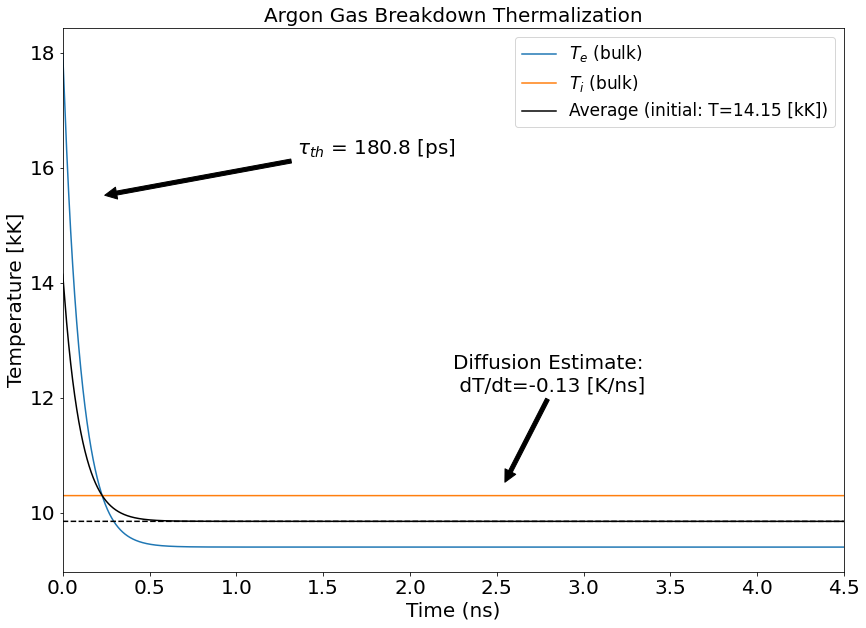

In [11]:
fig, ax = plt.subplots(figsize=(14,10),facecolor='w')


# ti_1, ti_2 = -20000, -1
ti_1, ti_2 = -100, -1

T_av_1 = T_av[ti_1]
T_av_2 = T_av[ti_2]

dT_dt  = (T_av_2 - T_av_1)/(ttm.t_list[ti_2] - ttm.t_list[ti_1])

T_eq_line  = np.array(T_av_1 + dT_dt*(ttm.t_list-ttm.t_list[ti_1]))


ax.plot(np.array(ttm.t_list)*1e9, Te_bulks*1e-3,label=r"$T_e$ (bulk)")
ax.plot(np.array(ttm.t_list)*1e9, Ti_bulks*1e-3,label=r"$T_i$ (bulk)")
ax.plot(np.array(ttm.t_list)*1e9, T_eq_line*1e-3,'--k')#,label='Diffusion Estimate: dT/dt={0:.2f} [K/ns]'.format(dT_dt*1e-9))
ax.plot(np.array(ttm.t_list)*1e9, T_av*1e-3,'-k',label='Average (initial: T={0:.2f} [kK])'.format(T_av[0]*1e-3))

ax.annotate(r'$\tau_{th}$' + ' = {0:.1f} [ps]'.format(ttm.experiment.τei_Equilibration*1e12), xy=(0.1, 0.6), xycoords='figure fraction',
            xytext=(0.3, .8), textcoords='axes fraction',
            va='top', ha='left',fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.02))

ax.annotate('Diffusion Estimate:\n dT/dt={0:.2f} [K/ns]'.format(dT_dt*1e-9), xy=(0.5, 0.2), xycoords='figure fraction',
            xytext=(0.5, .4), textcoords='axes fraction',
            va='top', ha='left',fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.02))


# Plot settings
ax.set_xlabel(r"Time (ns)", fontsize=20)
ax.set_ylabel("Temperature [kK]",fontsize=20)
ax.tick_params(labelsize=20)
ax.set_xlim(0,ttm.tmax*1e9)

ax.set_title('Argon Gas Breakdown Thermalization',fontsize=20)
ax.legend(fontsize=17)
plt.show()